# Encoding experiments

In this notebook we perform different ways to encode the concepts' features based on *Rank_PF*, *Disting*, and *Intercorr_str_tax*. 
This notebooks uses the generated custom dataset... 

## Header

Libraries and additional programs

In [105]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy
import random
from scipy.stats.stats import pearsonr

%matplotlib inline

pathh = '../Data/' 
exp_file = '../Data/ExperimentalResults.xlsx'   

## Our own benchmark

As part of our research we created a semantic similarity benchmark. It consists of 64 pairs of concepts, each of which was manually rated by humans. 0 for non similar at all and 10 for 'the same concept'.

In [106]:
def ListConcepts ():
    "Read an excel file and returns a list of pairs of concepts with its similarity value (according to humans)"
    df = pd.read_excel(exp_file)
    concepts_sim = df[['concept 1','concept 2', 'Q1']]
    concepts_sim = concepts_sim.values.tolist() #converting to list...
    concepts_sim = list(map(lambda x: [str(x[0]), str(x[1]), x[2]], concepts_sim))
    return concepts_sim

def ListNames (PairConcepts):
    "Given the list of pairs of concepts. It returns a list of the concept names without repetition"
    L = set([])
    for x in PairConcepts:
        L.add(x[0])
        L.add(x[1])
    return sorted(list(L))

Concepts_benchmark = ListConcepts()
# Sorting by similarity x[2]
Concepts_benchmark = sorted(Concepts_benchmark, key = lambda x : x[2])

concepts_pairs = [x[:2] for x in Concepts_benchmark]
concepts_sim = [x[2] for x in Concepts_benchmark]
concepts_names = ListNames(concepts_pairs)

### a) Visualizing benchmark

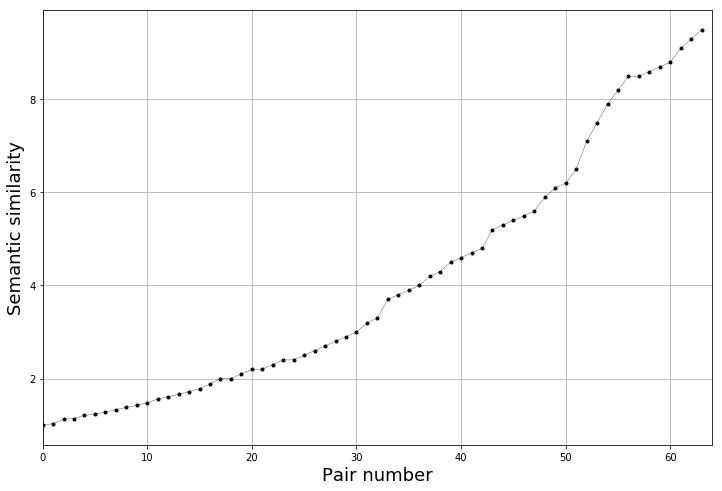

In [107]:
# Plotting
x = np.array(range(64))
plt.rcParams["figure.figsize"] = [12,8]
plt.plot(concepts_sim, color='k', linestyle='-', marker='.', markersize=6, linewidth=.3 )  
plt.xlim((0,64))
plt.xlabel('Pair number', fontsize=18)
plt.ylabel('Semantic similarity', fontsize=18)
plt.grid(True)
plt.savefig('HumSim.png', dpi=300)

### b) Encoding dataset

In [108]:
%run EncodingDataset.ipynb

# Getting concept names to encode (from dataset...)
Init_mem('normal', 100, concepts_names)

# List of all concepts in dataset
# Concepts = get_concepts_list()    # SE OCUPA?? 

Begining to encode dataset...
End of encoding


### c) Measuring similarity

In this cell we measure the similarity of each pair of concepts with each similarity measure.

In [109]:
# Create dictionary of distances for each method
HD_sim = []; McRae_sim = []; WUP_sim = []; LCH_sim = []; Res_sim = []; JCN_sim = []

# Loop over all pairs of concepts
i = 0
print "Starting..."
for pair in concepts_pairs:
    print i,
    HD_sim.append(1. - HDvector.dist(Dict[pair[0]].getPointer(), Dict[pair[1]].getPointer()) / float(N))
    #McRae_sim.append( McRae_simi(pair) )
    #WUP_sim.append(similarity_fun(wn.wup_similarity, pair))
    #LCH_sim.append(similarity_fun(wn.lch_similarity, pair))
    #Res_sim.append(similarity_fun(wn.res_similarity, pair, brown_ic))
    #JCN_sim.append(similarity_fun(wn.jcn_similarity, pair, brown_ic))
    i += 1
print "\nDone!"

Starting...
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 
Done!


### d) Computing correlations

In [110]:
# Calculate correlations
correlations = [['HDC', pearsonr(concepts_sim, HD_sim)[0]], ['McRae', pearsonr(concepts_sim, McRae_sim)[0]],
                ['wup', pearsonr(concepts_sim, wup_sim)[0]], ['lch', pearsonr(concepts_sim, lch_sim)[0]],
                ['res', pearsonr(concepts_sim, res_sim)[0]], ['jcn', pearsonr(concepts_sim, jcn_sim)[0]]]

print sorted(correlations, key = lambda x: x[1], reverse = True)

ValueError: operands could not be broadcast together with shapes (64,) (0,) 

### e) Plotting

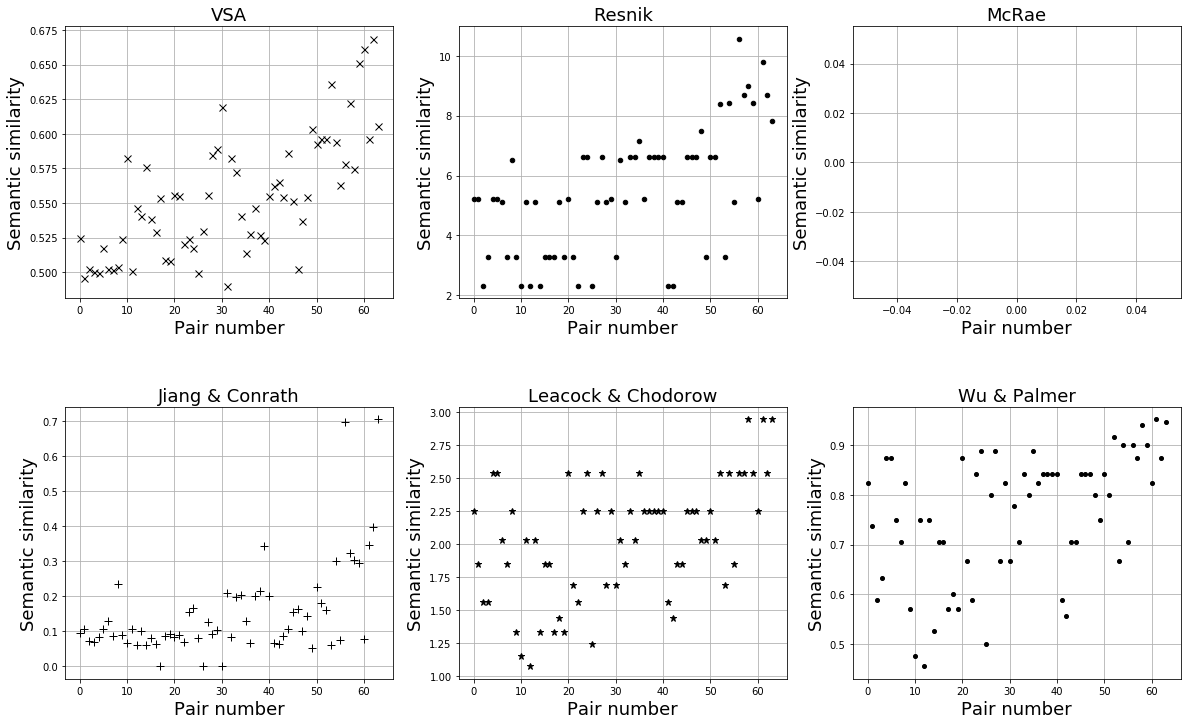

In [ ]:
# Plotting
plt.rcParams["figure.figsize"] = [20,12]
f_size = 18

plt.subplots_adjust(hspace=0.4)
plt.subplot(231)
plt.plot(HD_sim, color='k', linestyle='None', marker='x', markersize=7, linewidth=1 )  

plt.title('VSA', fontsize=f_size)
plt.xlabel('Pair number', fontsize=f_size)
plt.ylabel('Semantic similarity', fontsize=f_size)
plt.grid(True)

plt.subplot(232)
plt.plot(res_sim, color='k', linestyle='None', marker='.', markersize=9, linewidth=1 )  
plt.title('Resnik', fontsize=f_size)
plt.xlabel('Pair number', fontsize=f_size)
plt.ylabel('Semantic similarity', fontsize=f_size)
plt.grid(True)

plt.subplot(233)
plt.plot(McRae_sim, color='k', linestyle='None', marker='^', markersize=6, linewidth=1 )  
plt.title('McRae', fontsize=f_size)
plt.xlabel('Pair number', fontsize=f_size)
plt.ylabel('Semantic similarity', fontsize=f_size)
plt.grid(True)

plt.subplot(234)
plt.plot(jcn_sim, color='k', linestyle='None', marker='+', markersize=8, linewidth=1 )  
plt.title('Jiang & Conrath', fontsize=f_size)
plt.xlabel('Pair number', fontsize=f_size)
plt.ylabel('Semantic similarity', fontsize=f_size)
plt.grid(True)

plt.subplot(235)
plt.plot(lch_sim, color='k', linestyle='None', marker='*', markersize=7, linewidth=1 )  
plt.title('Leacock & Chodorow', fontsize=f_size)
plt.xlabel('Pair number', fontsize=f_size)
plt.ylabel('Semantic similarity', fontsize=f_size)
plt.grid(True)

plt.subplot(236)
plt.plot(wup_sim, color='k', linestyle='None', marker='.', markersize=8, linewidth=1 )  
plt.title('Wu & Palmer', fontsize=f_size)
plt.xlabel('Pair number', fontsize=f_size)
plt.ylabel('Semantic similarity', fontsize=f_size)
plt.grid(True)


plt.savefig('SubPlots.png') #, dpi=1000)

## Testing weighted HDC representations

Here we find the correlation between the similarity values obtained from the HDC weighted representations and the dataset.

In [ ]:
for mode in ['normal','Rank_PF','Disting','Intercorr_str', 'Intercorr-Rank']:
    for num_f in [6, 8, 10, 12, 15, 20]: #añadir más??
        # Printing current mode:
        print "\n\nMode:", mode, "  Number of features:", num_f
        # Initialize memory
        Init_mem( mode, num_f, concepts_names) 
        # Create list of distances
        HD_sim = []
        # Loop over all pairs of concepts
        i = 0
        #print "Starting..."
        for pair in concepts_pairs:
         #   print i,
            HD_sim.append( 1. - HDvector.dist(Dict[pair[0]].getPointer(), Dict[pair[1]].getPointer()) / float(N) )
            i += 1
        #print "\nDone!"
        
        correlation= pearsonr(concepts_sim, HD_sim)[0]
        print "  Correlation value: ", correlation



Mode: normal   Number of features: 6
Begining to encode dataset...
End of encoding
  Correlation value:  0.6031877770066713


Mode: normal   Number of features: 8
Begining to encode dataset...
End of encoding
  Correlation value:  0.6302594431174097


Mode: normal   Number of features: 10
Begining to encode dataset...
